env: findingzeke

In [148]:
import os
import glob
import requests
from dotenv import load_dotenv
import numpy as np

import matplotlib.pyplot as plt  
from matplotlib.image import  imread

In [149]:
load_dotenv()

True

In [150]:
# Replace with your actual API URL and API key in the .env file 
api_version="2023-02-01-preview"
api_url = f"{os.getenv('AZURE_AI_SERVICES_ENDPOINT')}/computervision/retrieval:vectorizeImage?overload=stream&api-version={api_version}"
api_key = os.getenv('AZURE_AI_SERVICES_KEY')

print(api_url)

https://cognitive-services-0200.cognitiveservices.azure.com/computervision/retrieval:vectorizeImage?overload=stream&api-version=2023-02-01-preview


In [151]:
test_image_path = "../images/test/zeke.png"
image_collection_path = "../images/collection"

In [152]:
def getImageEmbedding(image_path, api_url, api_key):

    # Open the image file in binary mode  
    with open(image_path, 'rb') as image_file:  
        # Set up the headers - assuming the API requires an API key  
        headers = {  
            'Content-Type': 'application/octet-stream',  # Specify the content type as a binary stream  
            'Ocp-Apim-Subscription-Key': api_key,       
        }  
        
        # Make the POST request to the API  
        response = requests.post(api_url, headers=headers, data=image_file)    
    
        # Check the response  
        if response.status_code == 200:  
            # print("Success! Image has been vectorized.")              
            vectorized_image_data = response.json()  # Assuming the response is JSON - adjust if the format is different  
            # print(vectorized_image_data["vector"])

            return vectorized_image_data["vector"]
        else:  
            print(f"Error: {response.status_code} - {response.text}")
            return None

In [153]:
def getFilesInDirectory(directory_path):
    
    return glob.glob(os.path.join(directory_path, "*.png")  )  

In [154]:
def getCosineSimilarity(vector_a, vector_b):  
    # Calculate the dot product of the two vectors  
    dot_product = np.dot(vector_a, vector_b)  
      
    # Calculate the magnitude (norm) of each vector  
    norm_a = np.linalg.norm(vector_a)  
    norm_b = np.linalg.norm(vector_b)  
      
    # Calculate the cosine similarity  
    similarity = dot_product / (norm_a * norm_b)  
      
    return similarity  

In [155]:
#Get all files in the directory
file_collection = getFilesInDirectory(image_collection_path)
print(f"{len(file_collection)} files found.")

15 files found.


In [156]:
cosine_similarity_dictionary = {}

embeddings_test_image = getImageEmbedding(image_path=test_image_path,api_url=api_url, api_key=api_key)
print(f"Embedding size: {len(embeddings_test_image)}")

for file in file_collection:
    cosine_similarity = getCosineSimilarity(embeddings_test_image, getImageEmbedding(image_path=file,api_url=api_url, api_key=api_key))
    # print(f"file:{file}, cosine_similarity:{cosine_similarity}")
    cosine_similarity_dictionary[file] = cosine_similarity

print("Embeddings generated and similarity calculated.")
print(type(cosine_similarity_dictionary))

Embedding size: 1024
Embeddings generated and similarity calculated.
<class 'dict'>


In [157]:
#Sort descending
sorted_data = sorted(cosine_similarity_dictionary.items(), key=lambda item: item[1], reverse=True)  
print(type(sorted_data))

#View sorted scores
for index, (path, score) in enumerate(sorted_data):    
    print(f"{index}, {path}: {score}")  


<class 'list'>
0, ../images/collection\h9.png: 0.9328878483880662
1, ../images/collection\h10.png: 0.9236968898407515
2, ../images/collection\h14.png: 0.9076982979066337
3, ../images/collection\h5.png: 0.902956885266125
4, ../images/collection\h15.png: 0.8930028263331296
5, ../images/collection\h3.png: 0.8840086626962648
6, ../images/collection\h4.png: 0.8836948635104338
7, ../images/collection\h11.png: 0.8827315033500139
8, ../images/collection\h12.png: 0.855964621983518
9, ../images/collection\h6.png: 0.8377816295259476
10, ../images/collection\h8.png: 0.8249584974902306
11, ../images/collection\h13.png: 0.8208913508298019
12, ../images/collection\h7.png: 0.8080770689655372
13, ../images/collection\h2.png: 0.8055933504823257
14, ../images/collection\h1.png: 0.784088634136538


**Showing Zeke**


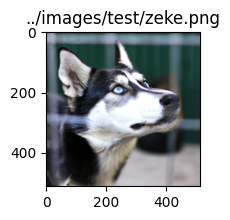

Showing top 3 best matches


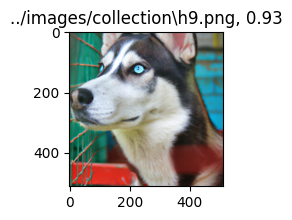

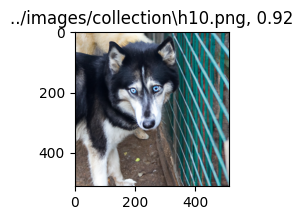

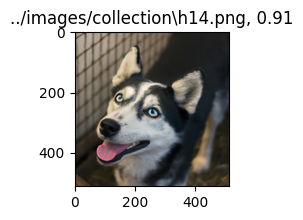

In [161]:
print(f"**Showing Zeke**")

plt.figure(figsize=(2,2))
plt.imshow(imread(test_image_path))  
plt.title(f"{test_image_path}")
plt.show()

top_N = 3

print(f"Showing top {top_N} best matches")

for index, (path, score) in enumerate(sorted_data[:top_N]):    

    plt.figure(figsize=(2,2))
    plt.imshow(imread(path))  
    plt.title(f"{path}, {round(score,2)}")
    plt.show()  

Showing least 3 matches


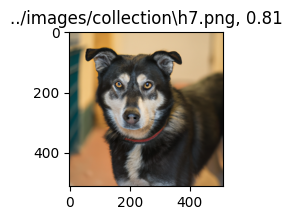

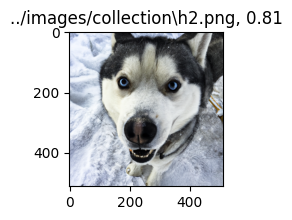

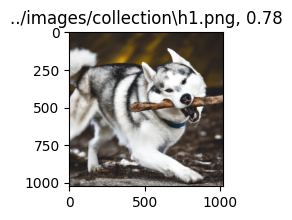

In [159]:
print(f"Showing least {top_N} matches")

for index, (path, score) in enumerate(sorted_data[-top_N:]):    

    plt.figure(figsize=(2,2))
    plt.imshow(imread(path))  
    plt.title(f"{path}, {round(score,2)}")
    plt.show()  